In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/National_education_cost/CP1.csv")
import warnings
warnings.filterwarnings("ignore")

df.head()

,Unnamed: 0,Public Two-Year,Public Four-Year,Private Nonprofit Four-Year
0,86-87,640.0,1260.0,5520.0
1,87-88,720.0,1420.0,5930.0
2,88-89,800.0,1520.0,6760.0
3,89-90,850.0,1640.0,7090.0
4,90-91,950.0,1800.0,7790.0


In [3]:
df.rename({"Unnamed: 0": "Year"}, axis=1, inplace=True)

In [4]:
df.dtypes

Year                            object
Public Two-Year                float64
Public Four-Year               float64
Private Nonprofit Four-Year    float64
dtype: object

In [5]:
# df.drop("Unnamed: 4", axis=1, inplace=True)

In [6]:
df.dtypes

Year                            object
Public Two-Year                float64
Public Four-Year               float64
Private Nonprofit Four-Year    float64
dtype: object

In [7]:
def replace_year(x):
    current = x[:2]
    if current[0] in ["8","9"]: return "19"+current
    else: return "20"+current
df['Year'] = df['Year'].apply(replace_year)

In [8]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [9]:
df.head()

,Year,Public Two-Year,Public Four-Year,Private Nonprofit Four-Year
0,1986,640.0,1260.0,5520.0
1,1987,720.0,1420.0,5930.0
2,1988,800.0,1520.0,6760.0
3,1989,850.0,1640.0,7090.0
4,1990,950.0,1800.0,7790.0


In [10]:
df.isna().sum()

Year                           0
Public Two-Year                0
Public Four-Year               0
Private Nonprofit Four-Year    0
dtype: int64

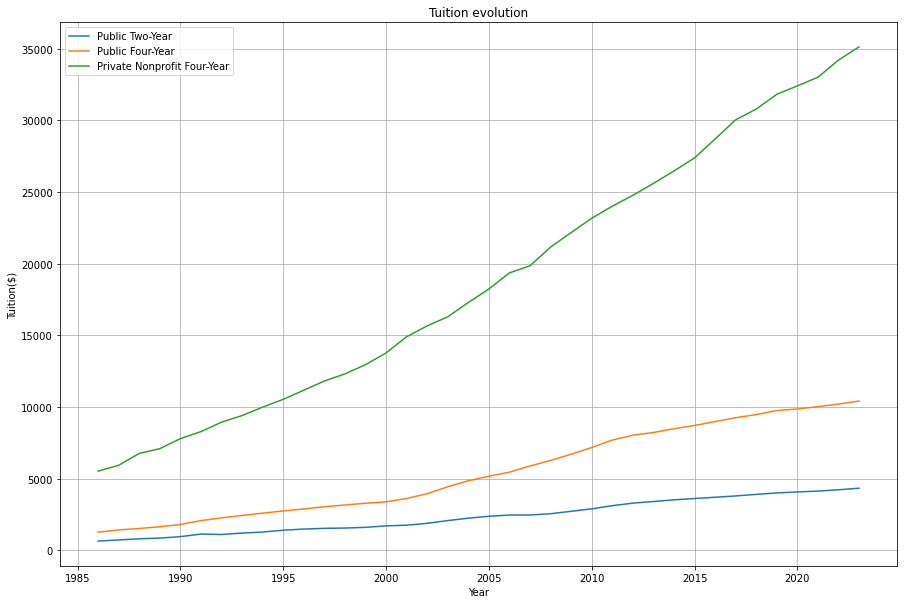

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
for columns in df.columns.to_list()[1:]:   
    sns.lineplot(data=df, x="Year", y=columns, label=columns)

plt.xlabel('Year')
plt.ylabel('Tuition($)')
plt.title('Tuition evolution')

plt.grid()
plt.legend()
plt.show()

- overall, Private Non profit 4-year has the highest tuition fee. 
- public two year and private two years even though same length of education differ when it comes to tuition fee.
- the three types of tuition fees have an ascending trend 
- private 4-years has the biggest growth if we compare the first value to the last value for the three of them and public two years has the lowest. 
- 

In [12]:
df.describe()

,Year,Public Two-Year,Public Four-Year,Private Nonprofit Four-Year
count,38.000000,38.000000,38.000000,38.000000
mean,2004.500000,2378.421053,5474.210526,18806.842105
std,11.113055,1172.999220,3078.478592,9209.402688
min,1986.000000,640.000000,1260.000000,5520.000000
25%,1995.250000,1420.000000,2775.000000,10690.000000
50%,2004.500000,2305.000000,5010.000000,17760.000000
75%,2013.750000,3490.000000,8415.000000,26252.500000
max,2023.000000,4330.000000,10410.000000,35130.000000


In [21]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
fig = px.line(df, x="Year", y=df.columns[1:], title="Tuition Trend", labels={'Year': 'Year', 'value': 'Tuition($)'}, width=700, height=600)
fig.update_layout(xaxis_title='Year', yaxis_title='Tuition($)', legend_title='')


fig.show()
# fig.write_html("../../../graphs/html/one/one.html")


In [14]:
import statsmodels.api as sm
df['const'] = 1

# Perform OLS regression for each target variable
results = {}
targets = df.columns.to_list()[1:-1]
targets

['Public Two-Year', 'Public Four-Year', 'Private Nonprofit Four-Year']

In [15]:

for target in targets:
    model = sm.OLS(df[target], df[['const', 'Year']])
    results[target] = model.fit()
results

{'Public Two-Year': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x178abc32c10>,
 'Public Four-Year': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x178ae330d00>,
 'Private Nonprofit Four-Year': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x178a494ab50>}

In [16]:
def linear_equation(coefficients):
    beta_0 = coefficients.params['const']  # Intercept coefficient
    beta_1 = coefficients.params['Year']   # Coefficient for the independent variable
    
    equation = f'y = {beta_0:.2f} + {beta_1:.2f} * x'
    return equation
coeffs = []
# Print regression results for each target variable
for target, result in results.items():
    coeffs.append(result.params['Year'])
    print(f"Regression results for {target}:")
    print(linear_equation(result))
    print(result.summary())
    print("\n")

Regression results for Public Two-Year:
y = -207884.61 + 104.90 * x
                            OLS Regression Results                            
Dep. Variable:        Public Two-Year   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2869.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.29e-36
Time:                        21:19:11   Log-Likelihood:                -238.55
No. Observations:                  38   AIC:                             481.1
Df Residuals:                      36   BIC:                             484.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [17]:
coeffs

[104.8955027902419, 273.91837181311496, 824.5300361090018]

<BarContainer object of 3 artists>

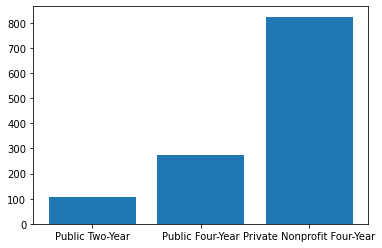

In [18]:
plt.bar(targets, coeffs)